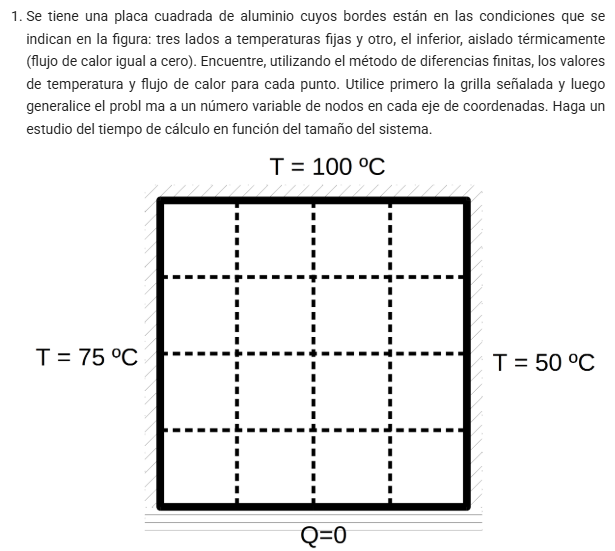

Consultas como se hace en clase

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [14]:
def temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno):
    beta = Nx/Ny
    b = np.zeros((Nx,Ny))

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[0,0] = cond_contor['A']
    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = cond_contor['D']
    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = (cond_contor['A'] + cond_contor['D'])/2

    b[0,1:Nx-1] = cond_contor['A'] 

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'flu':
        b[0,Nx-1] = cond_contor['A']
    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = cond_contor['B']
    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = (cond_contor['A'] + cond_contor['B'])/2


    b[1:Ny-1,-1] = cond_contor['B']

    if typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'flu':
        b[-1,-1] = cond_contor['B']
    elif typ_cond_contorno['B'] == 'flu' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = cond_contor['C']
    elif typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = (cond_contor['B'] + cond_contor['C'])/2

    b[-1,1:Nx-1] = cond_contor['C']

    if typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[-1,0] = cond_contor['C']
    elif typ_cond_contorno['C'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = cond_contor['D']
    elif typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = (cond_contor['C'] + cond_contor['D'])/2

    b[1:Ny-1,0] = cond_contor['D']

    b = b.flatten()

    filas_internas = np.arange(1, Ny-1)
    columnas_internas = np.arange(1,Nx-1)

    indices_filas_int, indices_columnas_int = np.meshgrid(filas_internas,columnas_internas,indexing='ij')

    flat_indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))


    print(indices_columnas_int,indices_filas_int)
    print(flat_indices)

    return b 


In [16]:
cond_contor = {'A':100,'B':50,'C':0,'D':75}
typ_cond_contorno = {'A':'temp','B':'temp','C':'temp','D':'temp'}

Nx = 5
Ny = 5

temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno)

[[1 2 3]
 [1 2 3]
 [1 2 3]] [[1 1 1]
 [2 2 2]
 [3 3 3]]
[ 6  7  8 11 12 13 16 17 18]


array([ 87.5, 100. , 100. , 100. ,  75. ,  75. ,   0. ,   0. ,   0. ,
        50. ,  75. ,   0. ,   0. ,   0. ,  50. ,  75. ,   0. ,   0. ,
         0. ,  50. ,  37.5,   0. ,   0. ,   0. ,  25. ])